# **Question 1**

In [5]:
processes = [
    {"pid": "P1", "arrival": 0, "burst": 7},
    {"pid": "P2", "arrival": 1, "burst": 4},
    {"pid": "P3", "arrival": 2, "burst": 15},
    {"pid": "P4", "arrival": 3, "burst": 11},
    {"pid": "P5", "arrival": 4, "burst": 20},
    {"pid": "P6", "arrival": 4, "burst": 9}
]

quantum = 5
time = 0
queue = []
completed = []
remaining = {p["pid"]: p["burst"] for p in processes}
arrival_dict = {p["pid"]: p["arrival"] for p in processes}
process_dict = {p["pid"]: p for p in processes}
execution_order = []
in_queue = set()

def add_new_arrivals(time):
    for p in processes:
        if p["arrival"] <= time and p["pid"] not in in_queue and p["pid"] not in [c["pid"] for c in completed]:
            queue.append(p["pid"])
            in_queue.add(p["pid"])

add_new_arrivals(time)

while queue:
    pid = queue.pop(0)
    exec_time = min(quantum, remaining[pid])
    execution_order.append((pid, time, time + exec_time))
    time += exec_time
    remaining[pid] -= exec_time
    add_new_arrivals(time)
    if remaining[pid] > 0:
        queue.append(pid)
    else:
        completed.append({
            "pid": pid,
            "completion": time,
            "turnaround": time - arrival_dict[pid],
            "waiting": time - arrival_dict[pid] - process_dict[pid]["burst"]
        })

print("Execution Order:")
for entry in execution_order:
    print(f"{entry[0]}: {entry[1]} -> {entry[2]}")

print("\nFinal Table:")
print("PID\tArrival\tBurst\tCompletion\tTurnaround\tWaiting")
for c in completed:
    p = process_dict[c["pid"]]
    print(f"{c['pid']}\t{p['arrival']}\t{p['burst']}\t{c['completion']}\t\t{c['turnaround']}\t\t{c['waiting']}")

Execution Order:
P1: 0 -> 5
P2: 5 -> 9
P3: 9 -> 14
P4: 14 -> 19
P5: 19 -> 24
P6: 24 -> 29
P1: 29 -> 31
P3: 31 -> 36
P4: 36 -> 41
P5: 41 -> 46
P6: 46 -> 50
P3: 50 -> 55
P4: 55 -> 56
P5: 56 -> 61
P5: 61 -> 66

Final Table:
PID	Arrival	Burst	Completion	Turnaround	Waiting
P2	1	4	9		8		4
P1	0	7	31		31		24
P6	4	9	50		46		37
P3	2	15	55		53		38
P4	3	11	56		53		42
P5	4	20	66		62		42


# **Question 3**

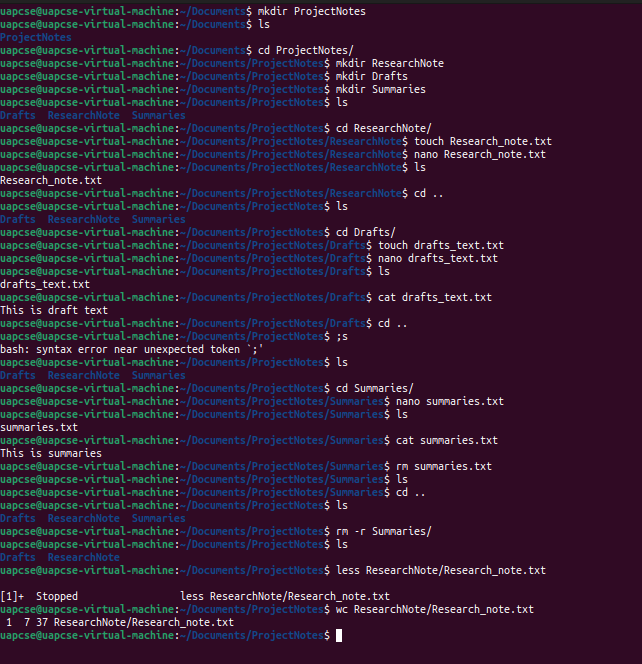